# Analysis of most promenant algorithm

In this notebook I will document the search for best algrothm to analyse TransferMonitoring data

## Loading and initial setup

In [30]:
%matplotlib inline
# Here i keep prepared csv file for ML
f = open('../data/output/json_hashed.csv')

import numpy as np
import pandas as pd
from pandas import read_csv
from IPython.display import display, HTML

# in order to display of dataframe
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 30)

dataframe = read_csv(f).astype(np.float32)

# to see struckture of data, uncoment
# dataframe 

# save headers to seperate list
original_headers = list(dataframe.columns.values)

# to see list of headeers, uncoment
print(len(original_headers))
display(original_headers)

55


['block_size',
 'buf_size',
 'channel_type',
 'chk_timeout',
 'dest_srm_v',
 'dst_hostname',
 'dst_site_name',
 'dst_url',
 'endpnt',
 'f_size',
 'file_metadata',
 'file_metadata|activity',
 'file_metadata|adler32',
 'file_metadata|dest_rse_id',
 'file_metadata|dst_rse',
 'file_metadata|dst_type',
 'file_metadata|filesize',
 'file_metadata|md5',
 'file_metadata|name',
 'file_metadata|previous_attempt_id',
 'file_metadata|request_id',
 'file_metadata|request_type',
 'file_metadata|scope',
 'file_metadata|src_rse',
 'file_metadata|src_rse_id',
 'file_metadata|src_type',
 'is_recoverable',
 'job_m_replica',
 'job_metadata',
 'job_metadata|issuer',
 'job_metadata|multi_sources',
 'job_state',
 'nstreams',
 'retry',
 'retry_max',
 'src_hostname',
 'src_site_name',
 'src_srm_v',
 'src_url',
 'srm_space_token_dst',
 'srm_space_token_src',
 't_channel',
 't_error_code',
 't_timeout',
 'tcp_buf_size',
 'time_srm_fin_st',
 'time_srm_prep_st',
 'timestamp_checksum_dest_st',
 'timestamp_chk_src_st

# Preprocesing step
## Check if data is missing any value

In [31]:
dataframe.isnull().any()

block_size                    False
buf_size                      False
channel_type                  False
chk_timeout                   False
dest_srm_v                    False
dst_hostname                  False
dst_site_name                 False
dst_url                       False
endpnt                        False
f_size                        False
file_metadata                 False
file_metadata|activity        False
file_metadata|adler32         False
file_metadata|dest_rse_id     False
file_metadata|dst_rse         False
                              ...  
srm_space_token_src           False
t_channel                     False
t_error_code                  False
t_timeout                     False
tcp_buf_size                  False
time_srm_fin_st               False
time_srm_prep_st              False
timestamp_checksum_dest_st    False
timestamp_chk_src_st          False
tr_timestamp_start            False
user_dn                       False
vo                          

In [32]:
# -- uncoment to see data types
# types = dataframe.dtypes
# types


In [33]:
try: 
    # if true, dataframe contains infinite numbers(bad)     
    print(np.all(np.isfinite(dataframe)))
except:
    pass

True


In [34]:
try:    
    print(np.any(np.isnan(dataframe)))
except:
    pass

False


Selecting importat features
---------

Since our datasets is quit big, we should reduce the values inorder to save resources and increase computational speed.

First we drop out unvanted columns that for sure will not tell anything important for us.

In [35]:
dataframe = dataframe.drop(['tr_id','tr_timestamp_start','t_error_code'], axis=1)

# a=list(dataframe.columns.values)

Now we pop out our target column, we will use it for later.

In [36]:
# from dataframe pop target column and transform to ndarray
target=dataframe.pop('timestamp_tr_dlt')

As an end result we will process this kind of matrix.

In [37]:
prepared_headers = list(dataframe.columns.values)


dataframe itself

In [38]:
from sklearn import preprocessing
dataframe


block_size  buf_size  channel_type  chk_timeout  dest_srm_v  \
0            0.0       0.0     88.301003       1800.0   87.146263   
1            0.0       0.0     88.301003       1800.0   87.146263   
2            0.0       0.0     88.301003       1800.0   87.146263   
3            0.0       0.0     88.301003       1800.0   87.146263   
4            0.0       0.0     88.301003       1800.0   87.146263   
5            0.0       0.0     88.301003       1800.0   87.146263   
6            0.0       0.0     88.301003       1800.0   87.146263   
7            0.0       0.0     88.301003       1800.0   87.146263   
8            0.0       0.0     88.301003          0.0   87.146263   
9            0.0       0.0     88.301003       1800.0   87.146263   
10           0.0       0.0     88.301003       1800.0   87.146263   
11           0.0       0.0     88.301003       1800.0   87.146263   
12           0.0       0.0     88.301003       1800.0   87.146263   
13           0.0       0.0     88.301003       1800.0   87.146263   
14           0.0       0.0     88.301003       1800.0   87.146263   
...          ...       ...           ...          ...         ...   
9985         0.0       0.0     88.301003       1800.0   87.146263   
9986         0.0       0.0     88.301003       1800.0   87.146263   
9987         0.0       0.0     88.301003       1800.0   87.146263   
9988         0.0       0.0     88.301003       1800.0   87.146263   
9989         0.0       0.0     88.301003       1800.0   87.146263   
9990         0.0       0.0     88.301003       1800.0   87.146263   
9991         0.0       0.0     88.301003       1800.0   87.146263   
9992         0.0       0.0     88.301003       1800.0   87.146263   
9993         0.0       0.0     88.301003       1800.0   87.146263   
9994         0.0       0.0     88.301003       1800.0   87.146263   
9995         0.0       0.0     88.301003       1800.0   87.146263   
9996         0.0       0.0     88.301003       1800.0   87.146263   
9997         0.0       0.0     88.301003       1800.0   87.146263   
9998         0.0       0.0     88.301003       1800.0   87.146263   
9999         0.0       0.0     88.301003       1800.0   87.146263   

      dst_hostname  dst_site_name    dst_url     endpnt        f_size  \
0        86.822952           -2.0  87.765656  88.678986  1.324933e+06   
1        86.822952           -2.0  88.024681  88.678986  2.616564e+09   
2        86.822952           -2.0  88.147797  88.678986  4.812512e+07   
3        88.369850           -2.0  88.318085  88.678986  9.678080e+05   
4        88.354218           -2.0  85.334045  88.678986  1.810400e+04   
5        88.369850           -2.0  88.582306  88.678986  3.485434e+06   
6        88.038094           -2.0  88.503510  88.678986  7.048000e+03   
7        86.668884           -2.0  86.254951  88.678986  9.532296e+08   
8        87.493095           -2.0  88.339600  88.138397  1.776136e+08   
9        88.666740           -2.0  87.874535  88.678986  3.826567e+09   
10       86.887505           -2.0  86.435204  87.602493  8.246903e+08   
11       88.369850           -2.0  88.668663  88.678986  1.212087e+08   
12       86.668884           -2.0  87.754784  88.678986  1.882221e+09   
13       88.369850           -2.0  88.228592  88.678986  4.149480e+05   
14       87.760818           -2.0  88.536331  88.678986  2.204698e+08   
...            ...            ...        ...        ...           ...   
9985     86.822952           -2.0  83.971390  88.678986  9.939030e+07   
9986     87.185249           -2.0  87.066994  88.678986  1.291900e+04   
9987     86.822952           -2.0  87.667038  88.678986  1.001332e+08   
9988     88.369850           -2.0  87.899094  88.678986  5.237700e+04   
9989     88.369850           -2.0  88.661072  88.678986  1.620409e+06   
9990     86.822952           -2.0  88.425850  88.678986  4.920058e+08   
9991     88.566856           -2.0  88.711082  88.678986  3.538500e+04   
9992     88.369850           -2.0  88.263435 

More checking on dataframe:

In [39]:
# corr = dataframe.corr().fillna(0).mul(100).astype(int)
corr = dataframe.corr().fillna(0).mul(100).astype(int)
corr

block_size  buf_size  channel_type  chk_timeout  \
block_size                           0         0             0            0   
buf_size                             0       100             0            0   
channel_type                         0         0             0            0   
chk_timeout                          0         0             0          100   
dest_srm_v                           0         0             0          -12   
dst_hostname                         0        -6             0            0   
dst_site_name                        0         0             0            0   
dst_url                              0         0             0           -1   
endpnt                               0        -1             0           54   
f_size                               0         5             0           -6   
file_metadata                        0         3             0          -38   
file_metadata|activity               0         6             0          -37   
file_metadata|adler32                0         1             0           -2   
file_metadata|dest_rse_id            0         6             0          -37   
file_metadata|dst_rse                0         6             0          -37   
...                                ...       ...           ...          ...   
src_site_name                        0         0             0            0   
src_srm_v                            0        -3             0          -10   
src_url                              0         0             0            0   
srm_space_token_dst                  0         4             0          -36   
srm_space_token_src                  0        -4             0            4   
t_channel                            0         1             0            0   
t_timeout                            0        10             0           -5   
tcp_buf_size                         0       100             0            0   
time_srm_fin_st                      0        14             0           23   
time_srm_prep_st                     0        98             0           -1   
timestamp_checksum_dest_st           0         7             0           -7   
timestamp_chk_src_st                 0        14             0          -36   
user_dn                              0         1             0            4   
vo                                   0         6             0          -18   
timestamp_tr_st                      0        16             0           23   

                            dest_srm_v  dst_hostname  dst_site_name  dst_url  \
block_size                           0             0              0        0   
buf_size                             0            -6              0        0   
channel_type                         0             0              0        0   
chk_timeout                        -12             0              0       -1   
dest_srm_v                         100             4              0        0   
dst_hostname                         4           100              0        1   
dst_site_name                        0             0              0        0   
dst_url                              0             1              0      100   
endpnt                              -9            -1              0        0   
f_size                               4             0              0        1   
file_metadata                      -16           -41              0        0   
file_metadata|activity             -15           -39              0        0   
file_metadata|adler32                0            -4              0        0   
file_metadata|dest_rse_id          -16           -39              0        0   
file_metadata|dst_rse              -15           -39              0        0   
...                                ...           ...            ...      ...   
src_site_name                        0             0              0        0   
src_srm_v                           -6             6       

Lets see corelation matrix, ploted
------

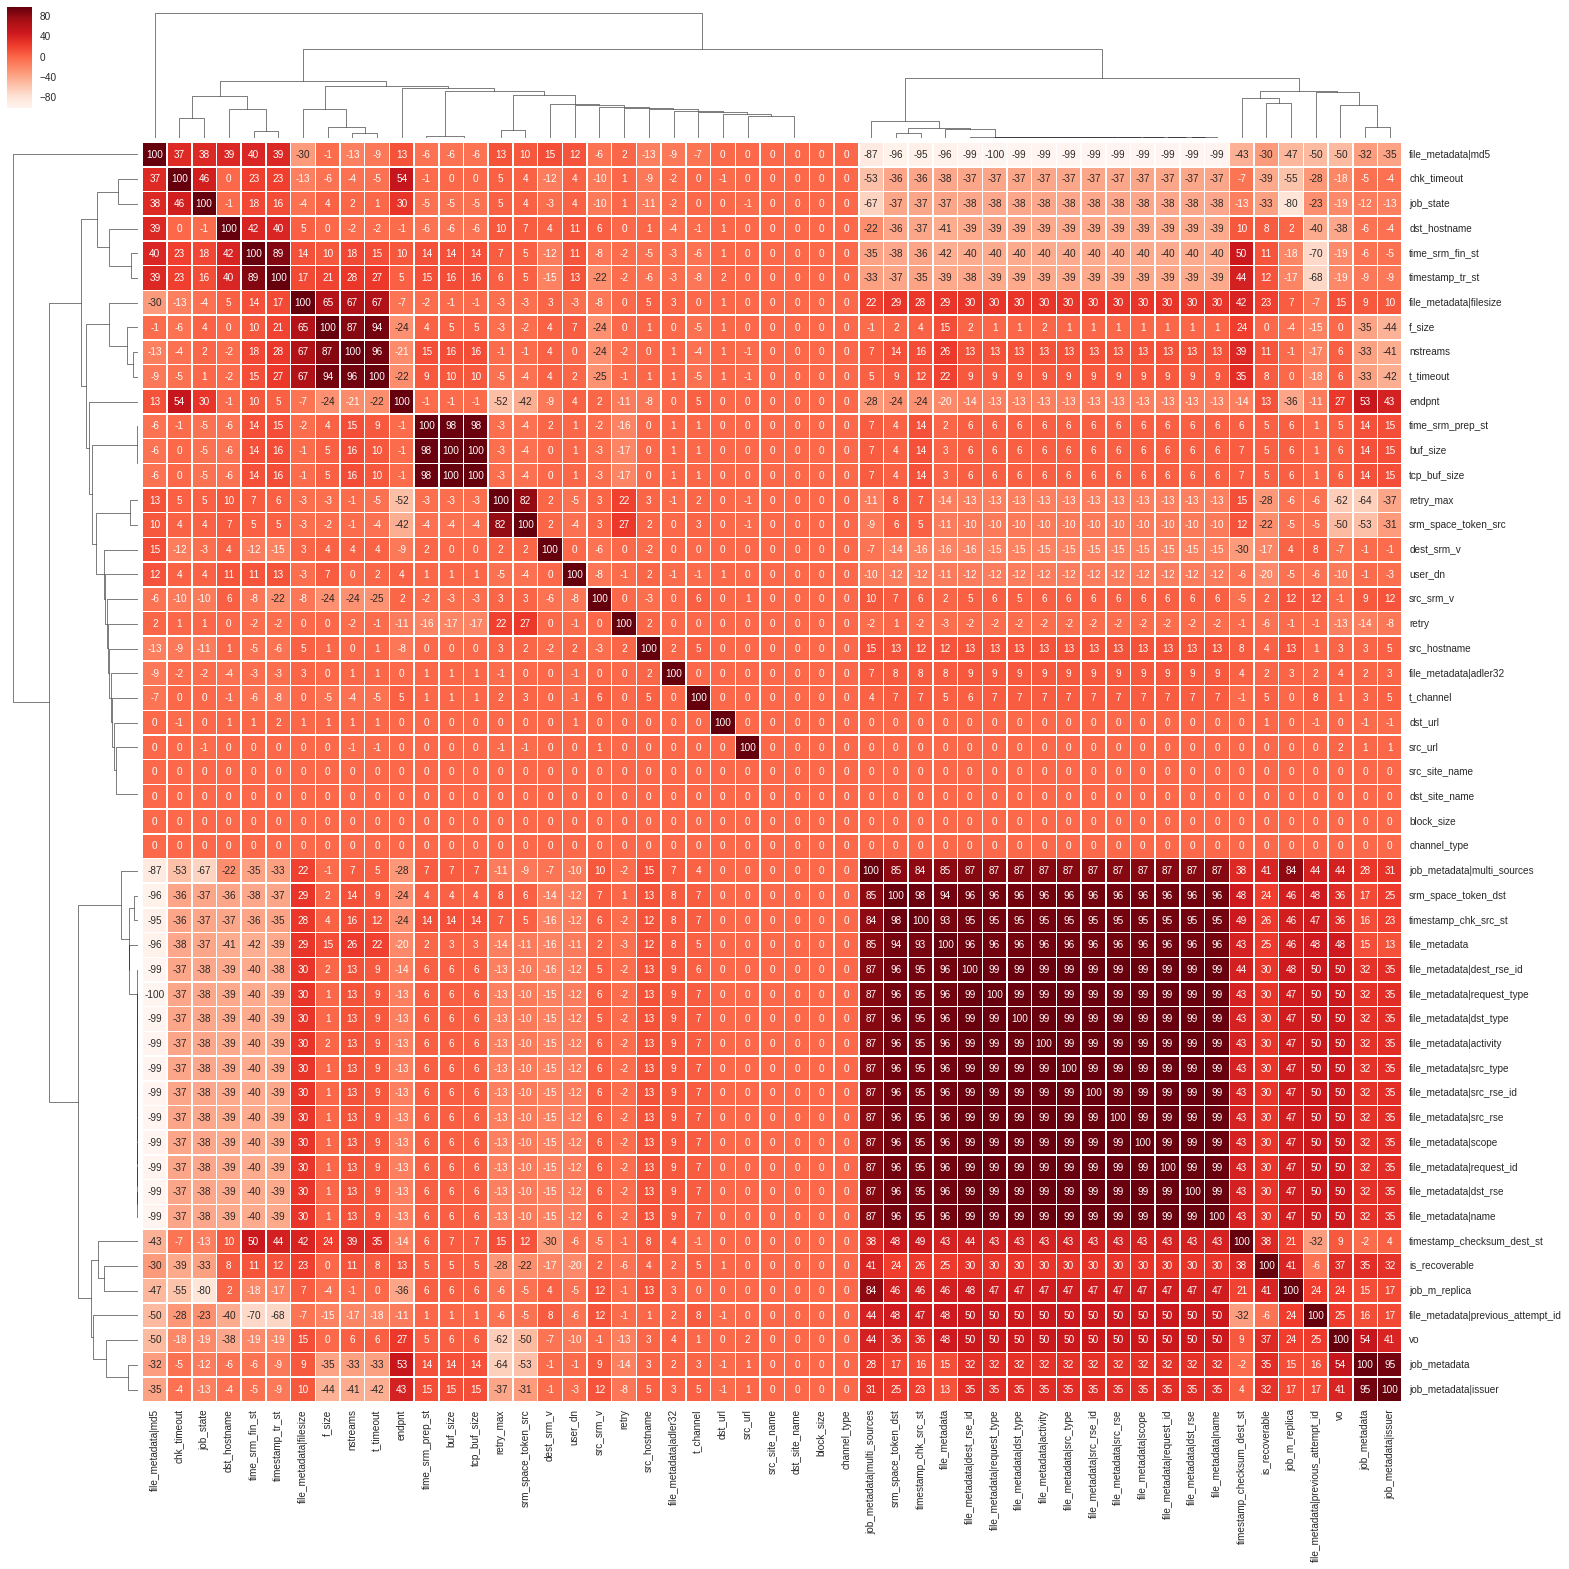

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# corr = pd.DataFrame(X_noVariance).corr().fillna(0).mul(100).astype(int)


cg = sns.clustermap(figsize=(25,25),data=corr, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt
sns.plt.show()

Checking for colums with no variance
----

In [41]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
# X_noVariance = sel.fit_transform(dataframe) # get new array
X_noVariance = sel.fit(dataframe) # get treshold with support


support_list = sel.get_support()
a= [i for i,x in enumerate(support_list) if x == 0]
# atributes with 0 change
for i in a:
    print(i,original_headers[i])

0 block_size
2 channel_type
6 dst_site_name
36 src_site_name


## Removing non variating values and correlation 

Trying scaling on data
------

In [42]:

matrix_to_scale = dataframe.as_matrix()
# matrix_to_scale

In [43]:
# scale_X = preprocessing.scale(matrix_to_scale)
# # type(matrix_to_scale)
# scale_X

#  scale between [0;1]
min_max_scaler = preprocessing.MinMaxScaler()
X_scalled = min_max_scaler.fit_transform(matrix_to_scale)
X_scalled  

array([[ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.99999982],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.        ],
       ..., 
       [ 0.        ,  1.        ,  0.        , ...,  0.94151497,
         0.24277496,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.99999458],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  1.        ]], dtype=float32)

ML learning phase
-----

Now we are preparing to matrixes to for analysis by transforming them to ndarray. One will be data, another one will be our target:

In [44]:
X = X_scalled
y = target.as_matrix()

Just to be sure, lets see how prepared data looks:

In [45]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.99999982],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.        ],
       ..., 
       [ 0.        ,  1.        ,  0.        , ...,  0.94151497,
         0.24277496,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  0.99999458],
       [ 0.        ,  1.        ,  0.        , ...,  0.85228157,
         0.2891922 ,  1.        ]], dtype=float32)

In [46]:
y

array([ -1.00000000e+00,   1.15848000e+05,  -1.00000000e+00, ...,
         7.55300000e+03,  -1.00000000e+00,   7.31550000e+04], dtype=float32)

In [47]:
import math
log_f= lambda x: math.log(x+2)
# log_f= lambda x: x

y = list(map(log_f,y))

# math.log(y+2)
# y

Now we will split data to train/test:

In [48]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=92)
len(X_train), len(X_test)

(6700, 3300)

Now we are prepared. Lets check some models and see results.

Algortihm benchmark
--------
I used the following chart to select different regression algorithms for checking.

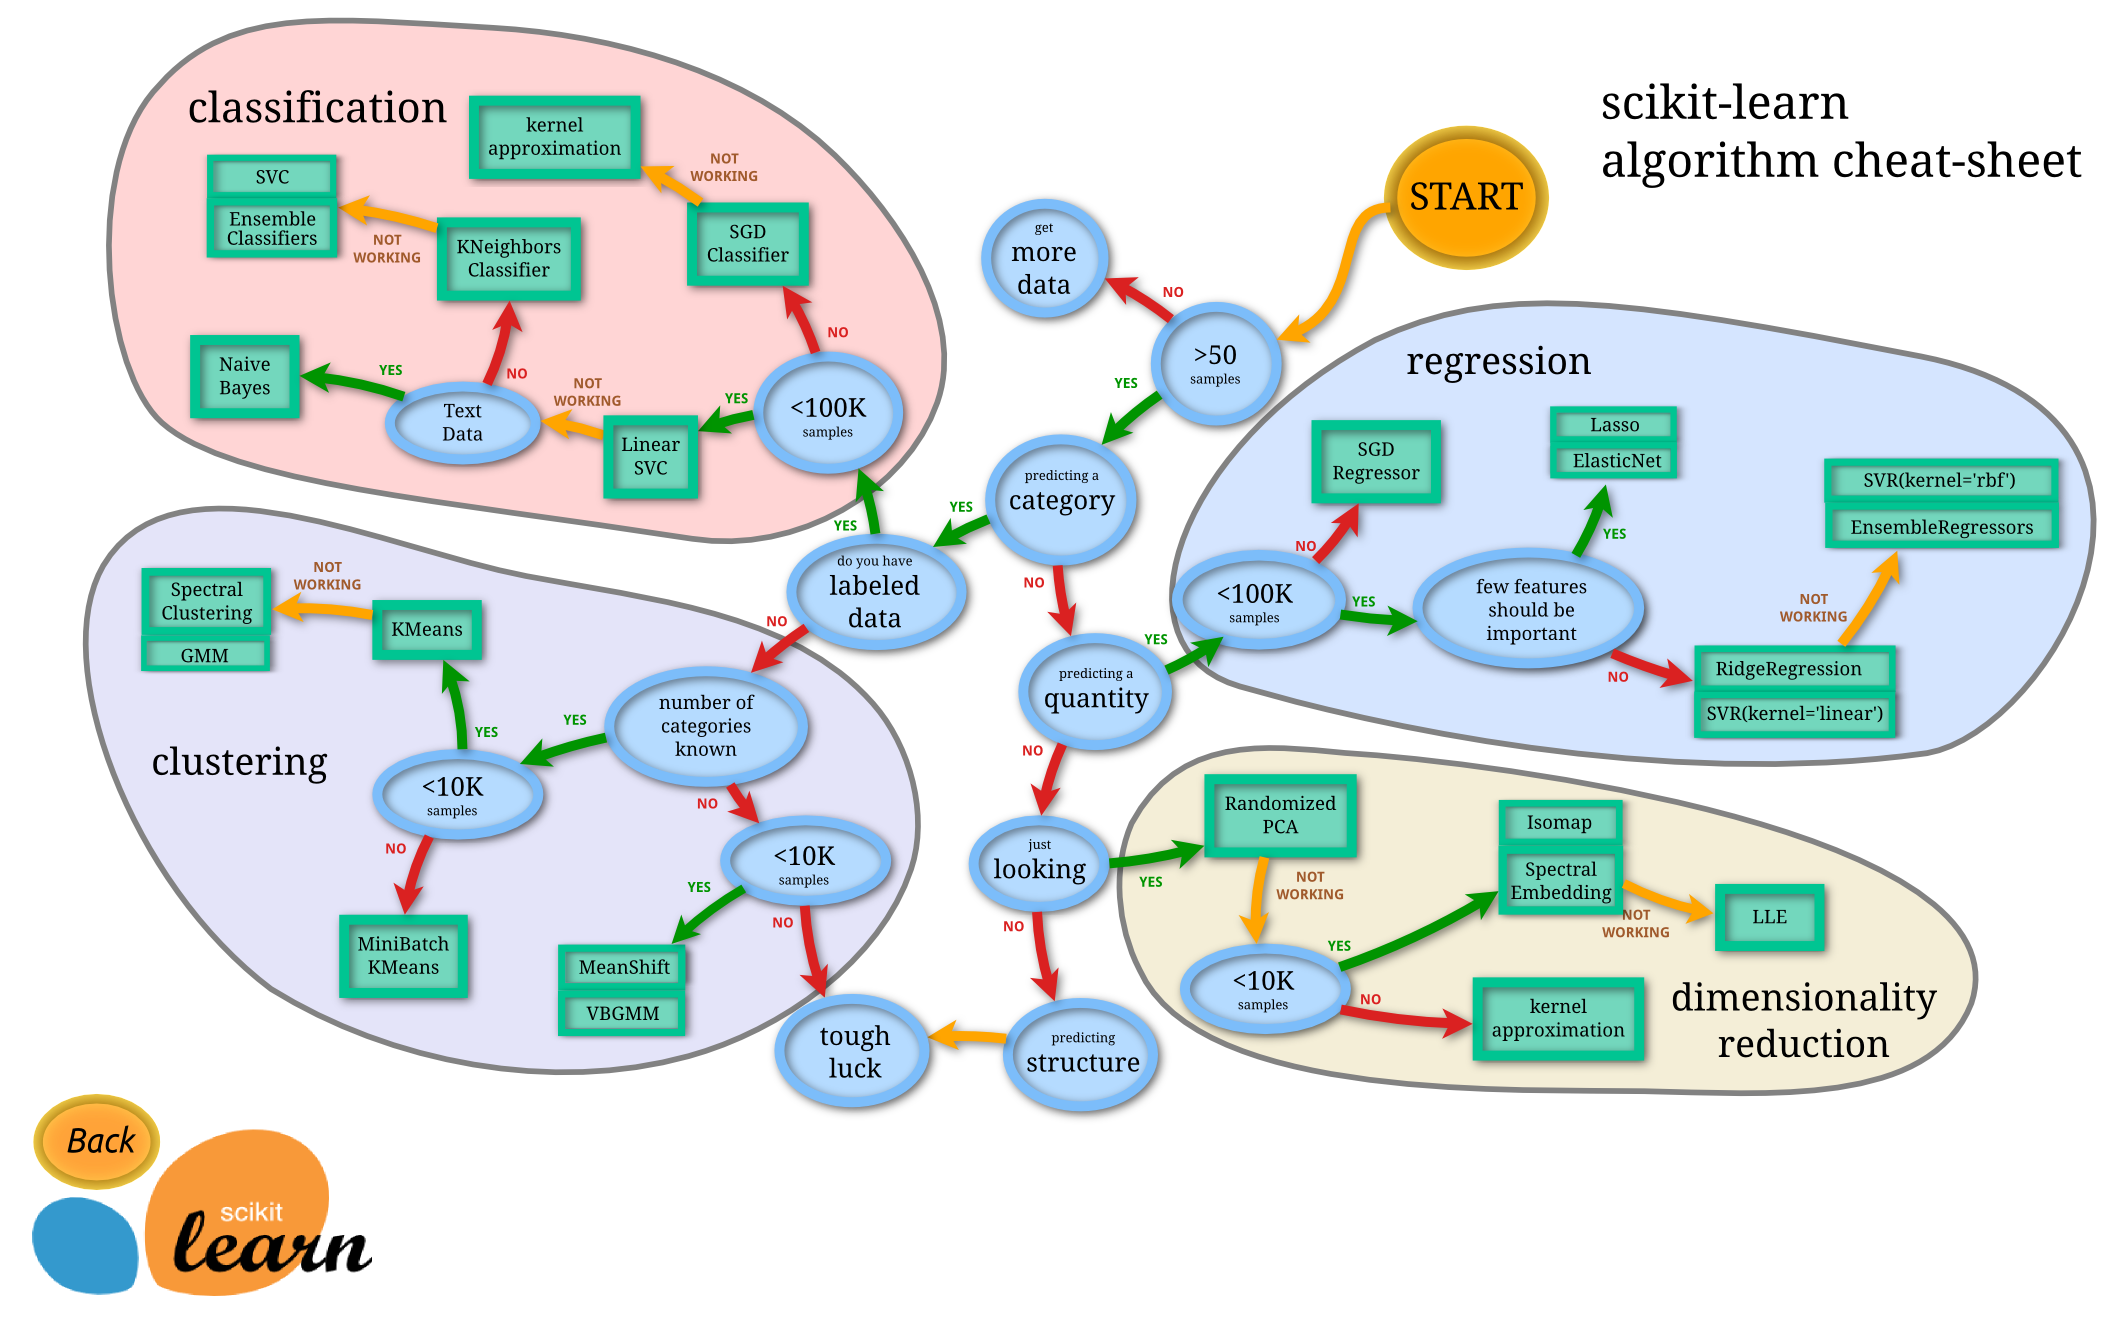

In [49]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")



RandomForestRegressor
----------------
First lets see how well RandomForestRegressor performs.

In [50]:
# Fit a Random Forest 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exp_2 = lambda x: math.exp(x) -2
y_test = list(map(exp_2,y_test))
y_pred = list(map(exp_2,y_pred))

output=[]
# comparing real values to predicted
for answ, pred in zip(y_test, y_pred): 
    output.append( (answ,pred) )
display(output[:100])
    


[(2554267.999999999, 2573714.401440065),
 (-1.0, -1.0),
 (-1.0, -1.0),
 (17000.999999999993, 9067.233532662292),
 (12269.000000000002, 6052.288979236933),
 (-1.0, -1.0),
 (18871.0, 30496.30191434572),
 (-1.0, -1.0),
 (7744.000000000003, 13350.635820820191),
 (-1.0, -1.0),
 (-1.0, -1.0),
 (-1.0, -1.0),
 (-1.0, -1.0),
 (-1.0, -1.0),
 (50314.99999999996, 51568.087418365445),
 (5704.999999999998, 6170.83861803534),
 (-1.0, -1.0),
 (6587.999999999995, 9003.659468026179),
 (6151.0000000000055, 8395.964143359528),
 (-1.0, -1.0),
 (-1.0, -1.0),
 (45325.00000000004, 203862.8111878976),
 (160636.0000000001, 256431.45896683875),
 (4453.000000000003, 3927.737318828595),
 (-1.0, -1.0),
 (7186.000000000003, 9672.551042382845),
 (104391.00000000003, 137491.28844920345),
 (-1.0, -1.0),
 (-1.0, -1.0),
 (6784.999999999996, 3114.9500702997275),
 (10217.999999999995, 10091.84388387318),
 (-1.0, -1.0),
 (106672.00000000009, 54397.065584347765),
 (7138.999999999996, 10951.232011239688),
 (12120.000000000007

Error rates of this model:

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

MAE: 25842.032336123433
RMSE: 25933376297.46383


SGD Regressor
-------------

In [52]:
# from sklearn import linear_model
# model = linear_model.SGDRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)


# output=[]
# # comparing real values to predicted
# for answ, pred in zip(y_test, y_pred): 
#     output.append( (answ,pred) )
# display(output[:100])

In [53]:
# print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
# print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

Cearly, not very good 


ElasticNet
-----------

In [54]:
# from sklearn import linear_model
# model = linear_model.Lasso(alpha=0.5)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# output=[]
# # comparing real values to predicted
# for answ, pred in zip(y_test, y_pred): 
#     output.append( (answ,pred) )
# display(output[:100])

In [55]:
# print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
# print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

Ridge
-----

In [56]:
# from sklearn import linear_model
# model = linear_model.Ridge(alpha=1.0)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# output=[]
# # comparing real values to predicted
# for answ, pred in zip(y_test, y_pred): 
#     output.append( (answ,pred) )
# display(output[:100])

In [57]:
# print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
# print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

Conclusion
------
So random forest is the only ML algorithm that give predictions not so far away.



Resources
-------
- http://stackoverflow.com/questions/11023411/how-to-import-csv-data-file-into-scikit-learn
- http://pandas.pydata.org/
- http://scikit-learn.org/stable/modules/scaling_strategies.html
- http://stackoverflow.com/questions/9590114/importance-of-pca-or-svd-in-machine-learning
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- http://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold
- http://stackoverflow.com/questions/29298973/removing-features-with-low-variance-scikit-learn